## CellRank analysis of Thomas Conlon's smoking project

In [1]:
import scanpy as sc
import scvelo as scv
import cellrank as cr
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import rcParams

# verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.verbosity = 3               
sc.logging.print_version_and_date()

Running Scanpy 1.7.1, on 2021-09-27 11:52.


In [2]:
cr.logging.print_versions()

cellrank==1.2.0 scanpy==1.7.1 anndata==0.7.5 numpy==1.20.1 numba==0.51.2 scipy==1.6.1 pandas==1.2.3 scikit-learn==0.23.2 statsmodels==0.11.1 python-igraph==0.7.1 scvelo==0.2.3 pygam==0.8.0 matplotlib==3.3.4 seaborn==0.11.1


In [3]:
## path variable
adata_path = '/mnt/platte_1/Projects/200217_SmokedMice_all/210429_Smoked_Mice_MoM_refined_annotation_NIKLAS_loom.h5ad'

In [4]:
## plotting parameters
sc.settings.figdir = sc.settings.figdir = '/home/niklas/projects/macrophages_smoking_THOMAS/02_figures/cellrank/'
sc.set_figure_params(vector_friendly = True)
scv.settings.figdir = sc.settings.figdir = '/home/niklas/projects/macrophages_smoking_THOMAS/02_figures/cellrank/'
scv.set_figure_params('scvelo', vector_friendly = True)
cr.settings.figdir = sc.settings.figdir = '/home/niklas/projects/macrophages_smoking_THOMAS/02_figures/cellrank/'
plt.rcParams['figure.figsize'] = (9, 9)
plt.rcParams['pdf.fonttype'] = 42

In [5]:
## load data
adata = sc.read(adata_path)

In [6]:
## explore meta data of adata object
adata

AnnData object with n_obs × n_vars = 7962 × 8393
    obs: 'air', 'condition', 'identifier', 'name', 'timepoint', 'n_counts', 'n_genes', 'percent.mito', 'QC_group', 'size_factors', 'S_score', 'G2M_score', 'phase', 'louvain_1', 'louvain', 'louvain_2', 'cell_type', 'cell_type_condition', 'louvain_3', 'cell_type_nano', 'meta_cell_type', 'cell_type_refined', 'dcluster', 'sub_louvain', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'n_counts', 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    uns: 'cell_type_colors', 'cell_type_nano_colors', 'cell_type_refined_colors', 'condition_colors', 'dcluster_colors', 'dendrogram_cell_type', 'dendrogram_louvain_2', 'hvg', 'louvain', 'louvain_1_colors', 'louvain_2_colors', 'louvain_3_colors', 'neighbors', 'pca', 'rank_genes_groups', 'sub_louvain_colors', 'timepoint_colors', 'umap'
    obsm

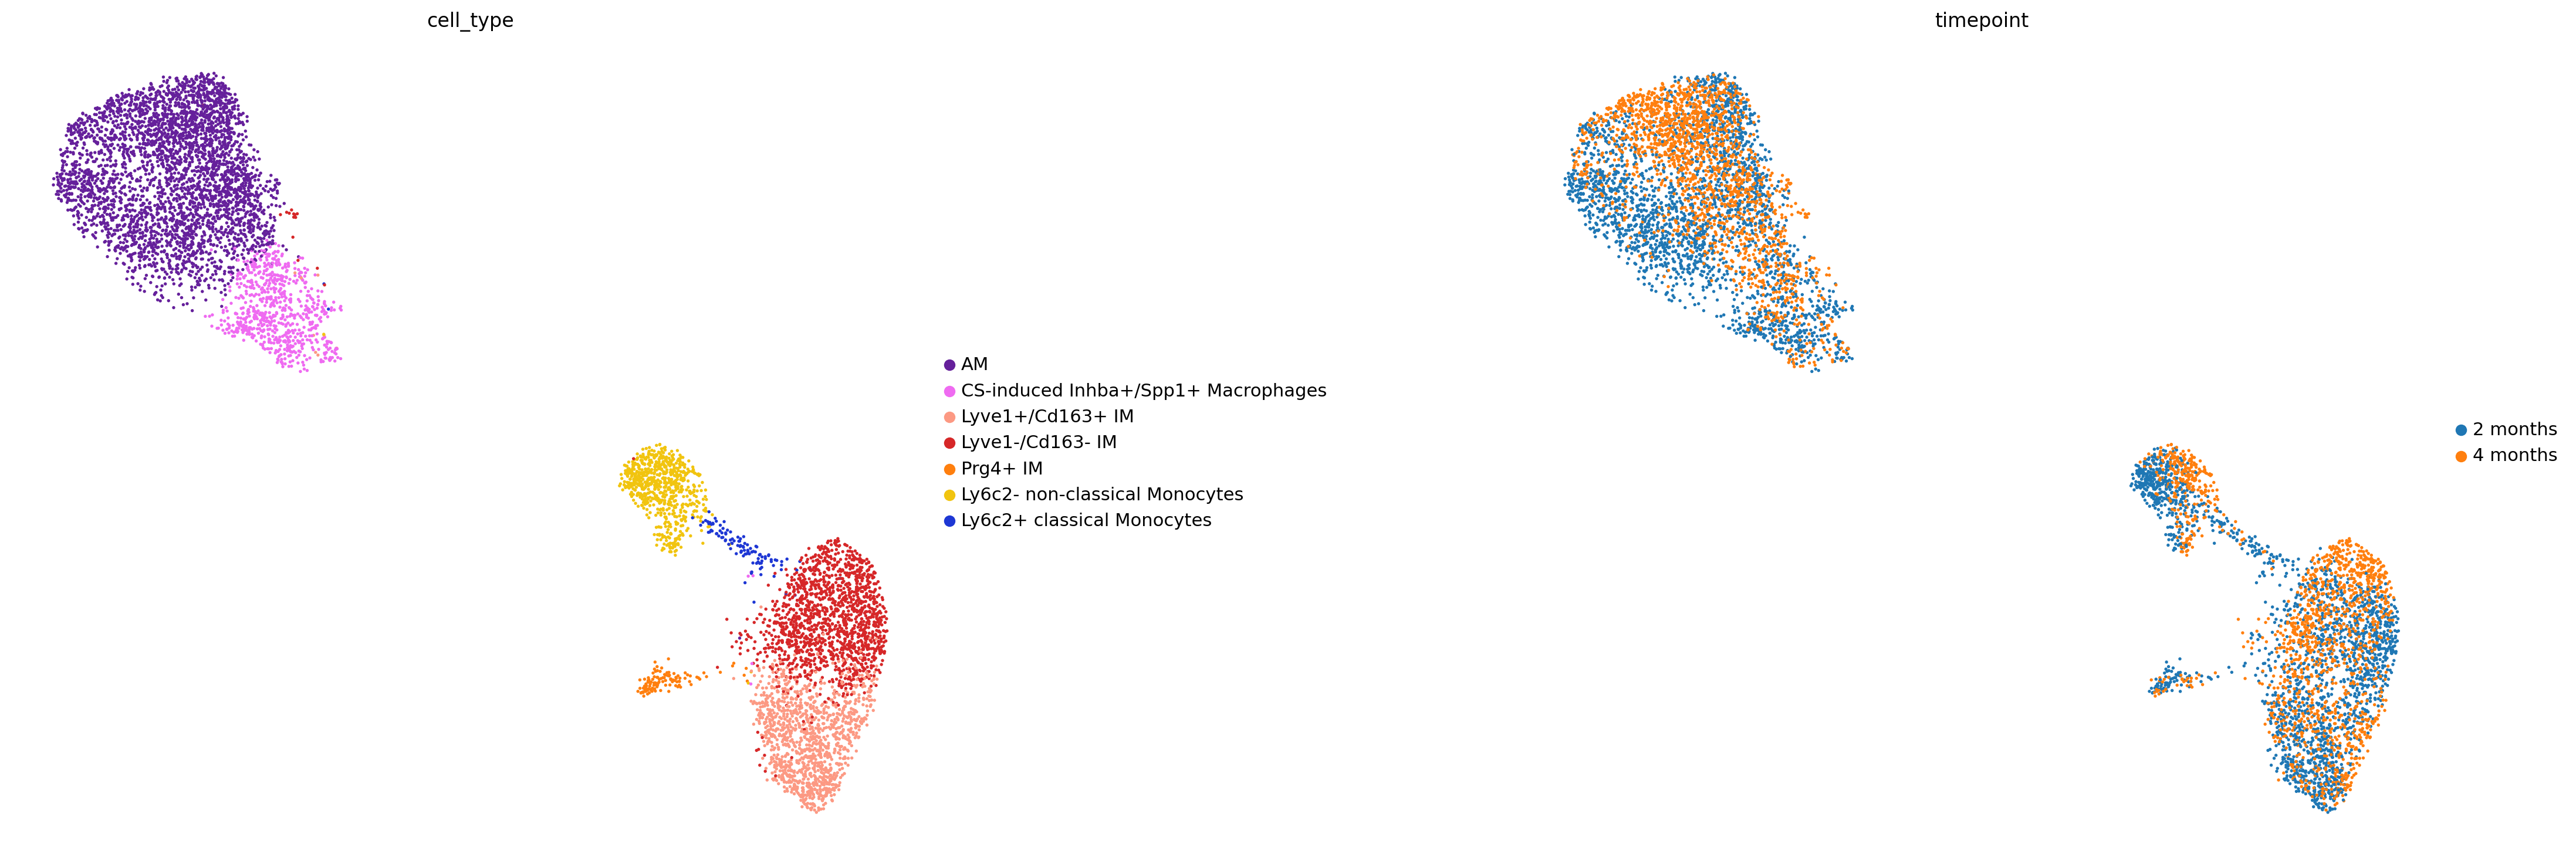

In [7]:
sc.pl.umap(adata, color = ['cell_type', 'timepoint'], wspace = .5, frameon = False)

## scVelo analysis

In [8]:
## plotting parameters
scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
scv.settings.presenter_view = True  # set max width size for presenter view

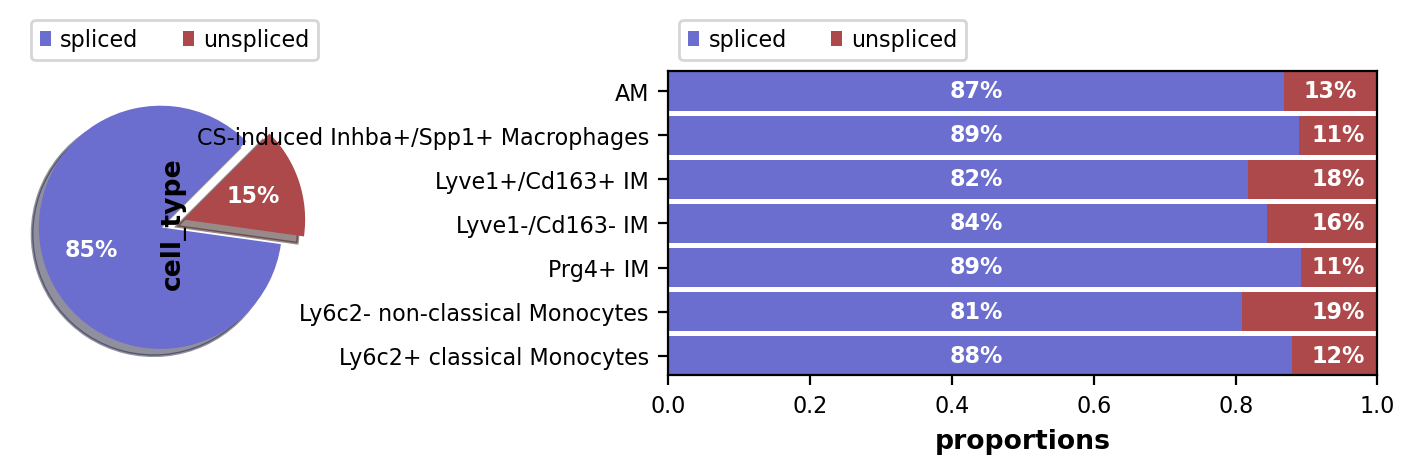

In [9]:
scv.pl.proportions(adata, groupby = 'cell_type')

## Preprocessing the data

In [10]:
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=4000)
sc.tl.pca(adata)
sc.pp.neighbors(adata, n_pcs=50, n_neighbors=30)
scv.pp.moments(adata, n_pcs=50, n_neighbors=30)

computing PCA
    on highly variable genes
    with n_comps=50


Filtered out 6277 genes that are detected 20 counts (shared).
Normalized count data: spliced, unspliced.
Skip filtering by dispersion since number of variables are less than `n_top_genes`.


    finished (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:12)


computing moments based on connectivities
    finished (0:00:01) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


## Compute and analyze velocities using scVelo

In [11]:
scv.tl.recover_dynamics(adata, n_jobs = 16)

recovering dynamics (using 16/32 cores)


  0%|          | 0/369 [00:00<?, ?gene/s]

    finished (0:00:32) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)


/home/niklas/miniconda3/envs/macrophages_smoking_THOMAS/lib/python3.8/site-packages/scvelo/tools/dynamical_model.py:697: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([dm.alpha, dm.beta, dm.gamma, dm.pars[:3]]) / dm.m[-1]
/home/niklas/miniconda3/envs/macrophages_smoking_THOMAS/lib/python3.8/site-packages/scvelo/tools/dynamical_model.py:700: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([dm.t, dm.tau, dm.t_, dm.pars[4]]) * dm.m[-1]


In [12]:
scv.tl.velocity(adata, mode='dynamical')
scv.tl.velocity_graph(adata)

computing velocities
    finished (0:00:02) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:05) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


## Project velocities onto the embedding

### Figure 1 l

computing velocity embedding
    finished (0:00:01) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
saving figure to file /home/niklas/projects/macrophages_smoking_THOMAS/02_figures/cellrank/scvelo_RNA_velocity.png


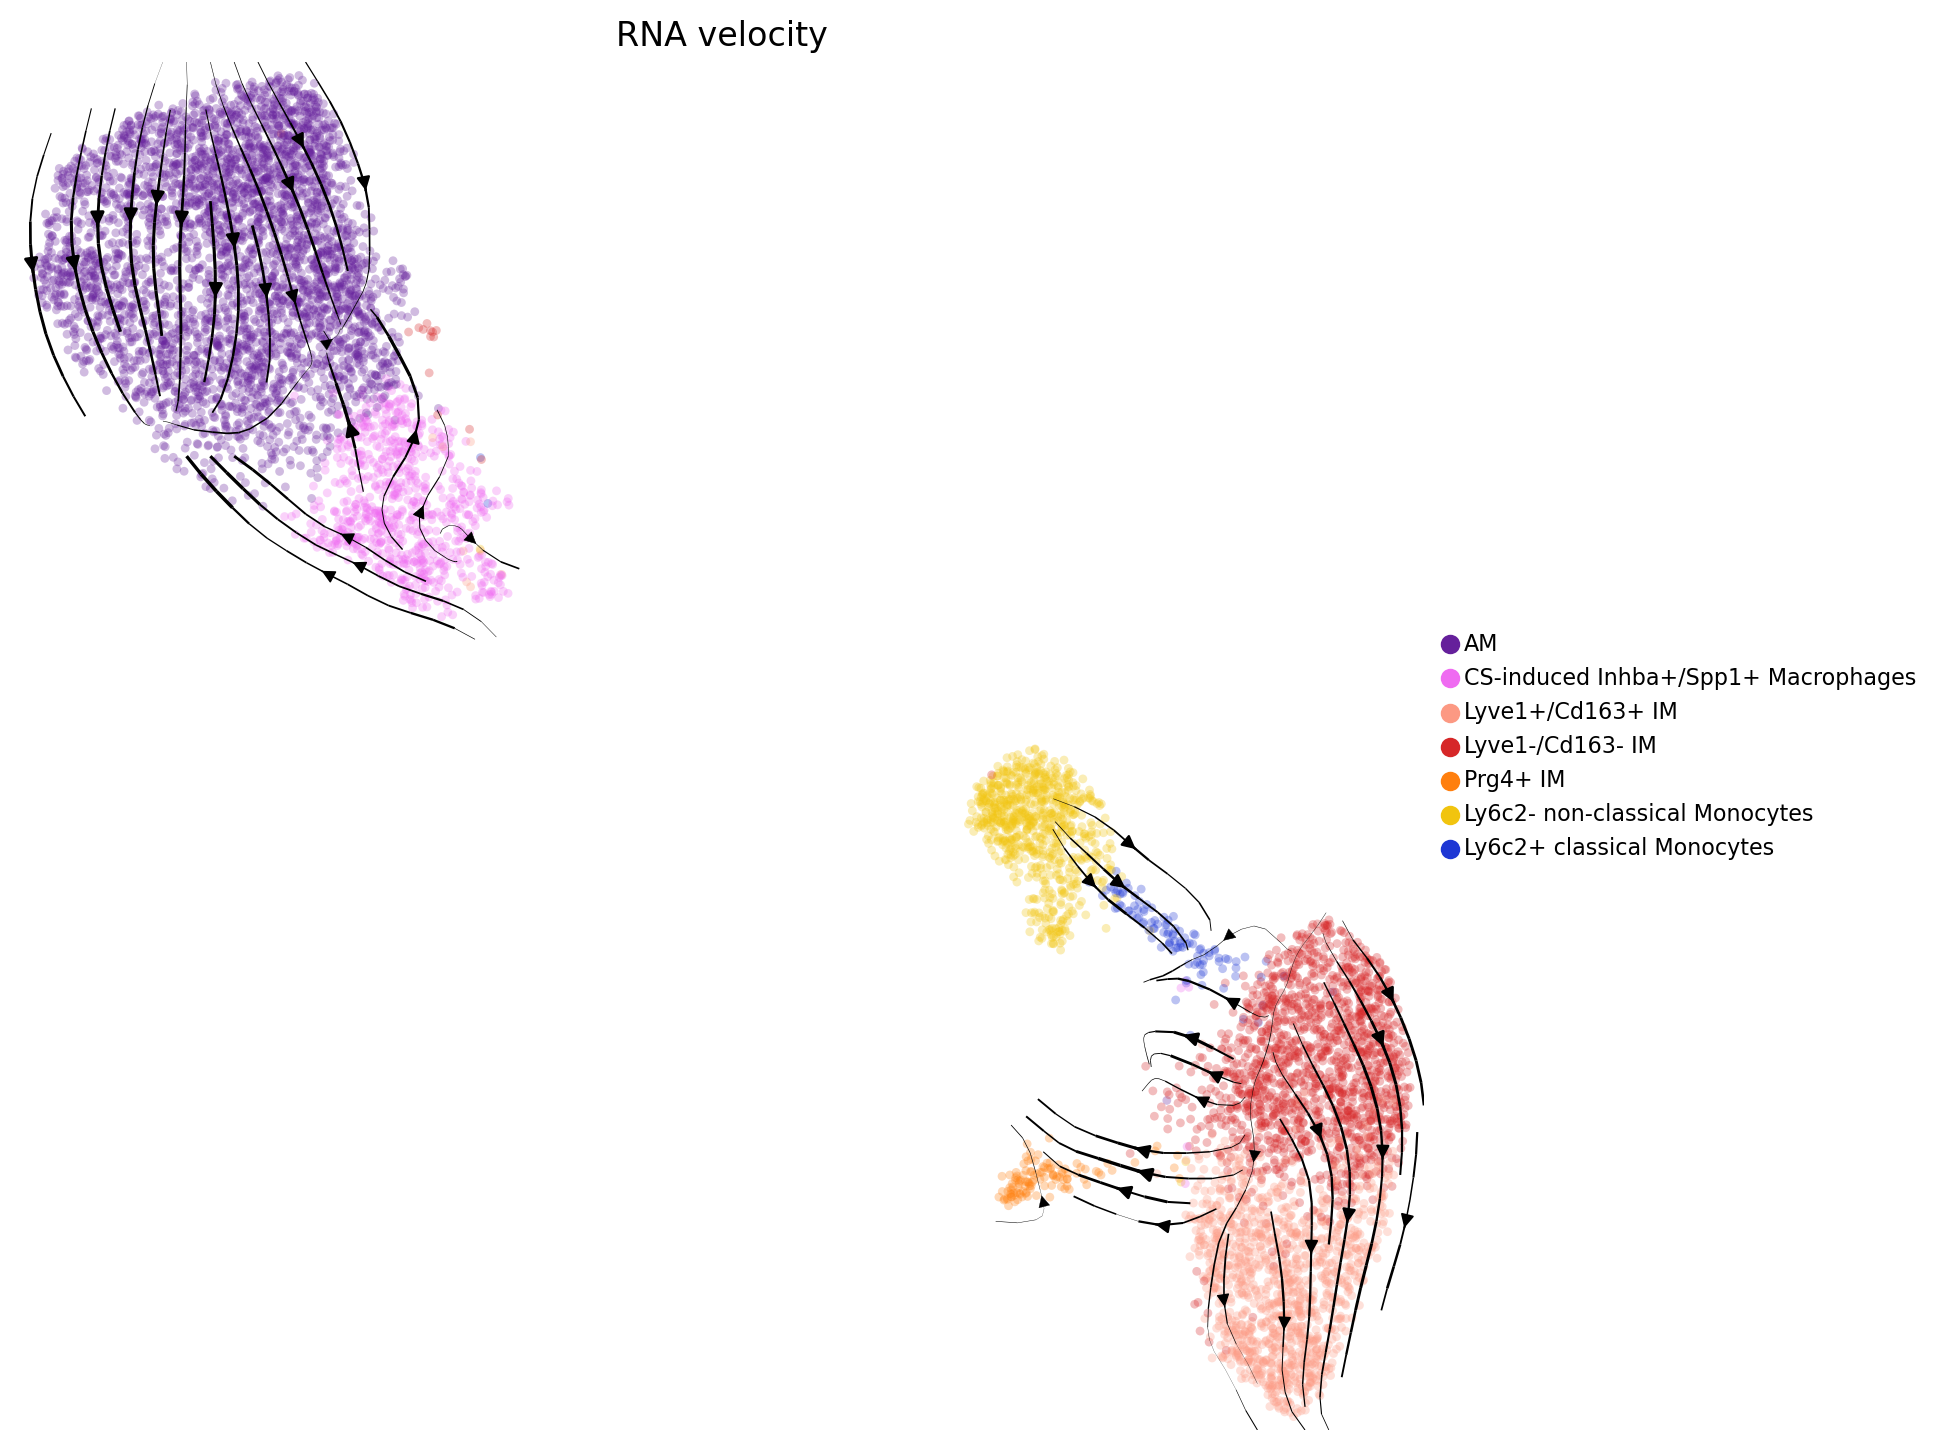

In [13]:
scv.pl.velocity_embedding_stream(adata, basis='umap', color = 'cell_type', 
                                 legend_loc = 'right margin', legend_fontsize=8, 
                                 title='RNA velocity', size = 40, smooth=.5, min_mass=2,
                                 save = 'RNA_velocity.png')

## Run CellRank

In [14]:
plt.rcParams['figure.figsize'] = (6, 5)

### Identify terminal states

  0%|          | 0/7962 [00:00<?, ?cell/s]

  0%|          | 0/7962 [00:00<?, ?cell/s]

saving figure to file /home/niklas/projects/macrophages_smoking_THOMAS/02_figures/cellrank/scvelo_terminal_states.pdf


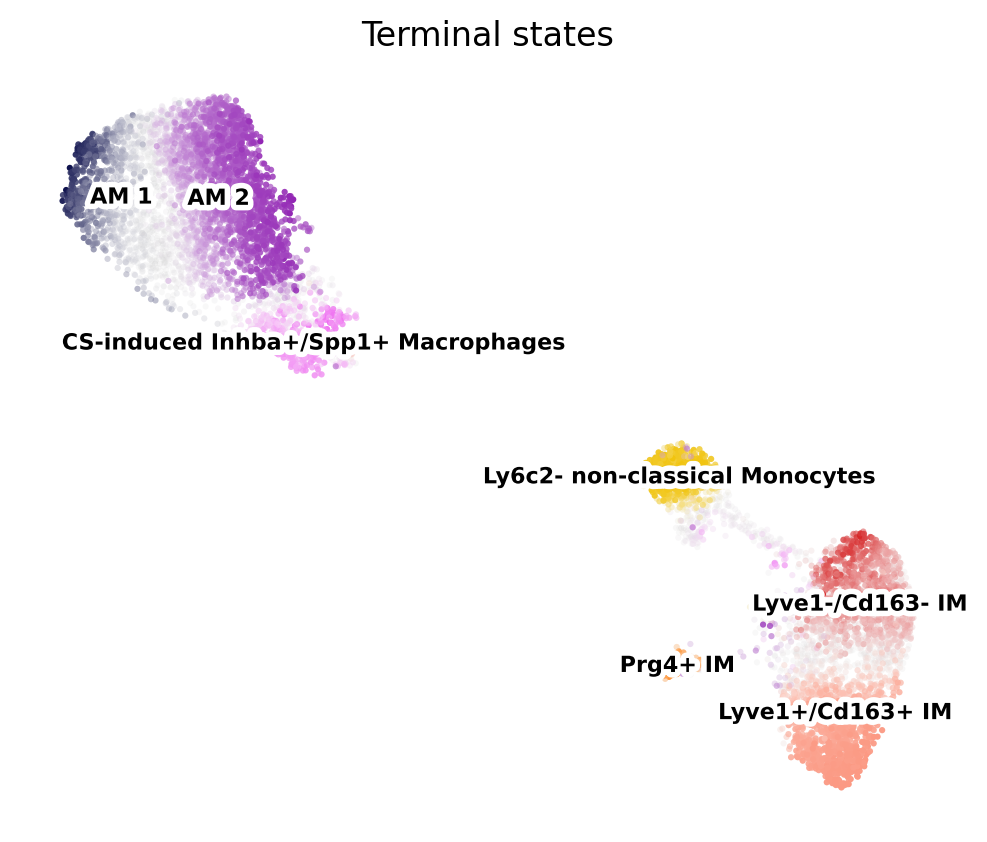

In [15]:
cr.tl.terminal_states(adata, cluster_key='cell_type', weight_connectivities=0.2, n_states = 7)
cr.pl.terminal_states(adata, legend_fontsize=8, legend_fontoutline=4, size = 20,
                      title = 'Terminal states', save = 'terminal_states.pdf' )

### Identify initial states

  0%|          | 0/7962 [00:00<?, ?cell/s]

  0%|          | 0/7962 [00:00<?, ?cell/s]

saving figure to file /home/niklas/projects/macrophages_smoking_THOMAS/02_figures/cellrank/scvelo_initial_states.pdf


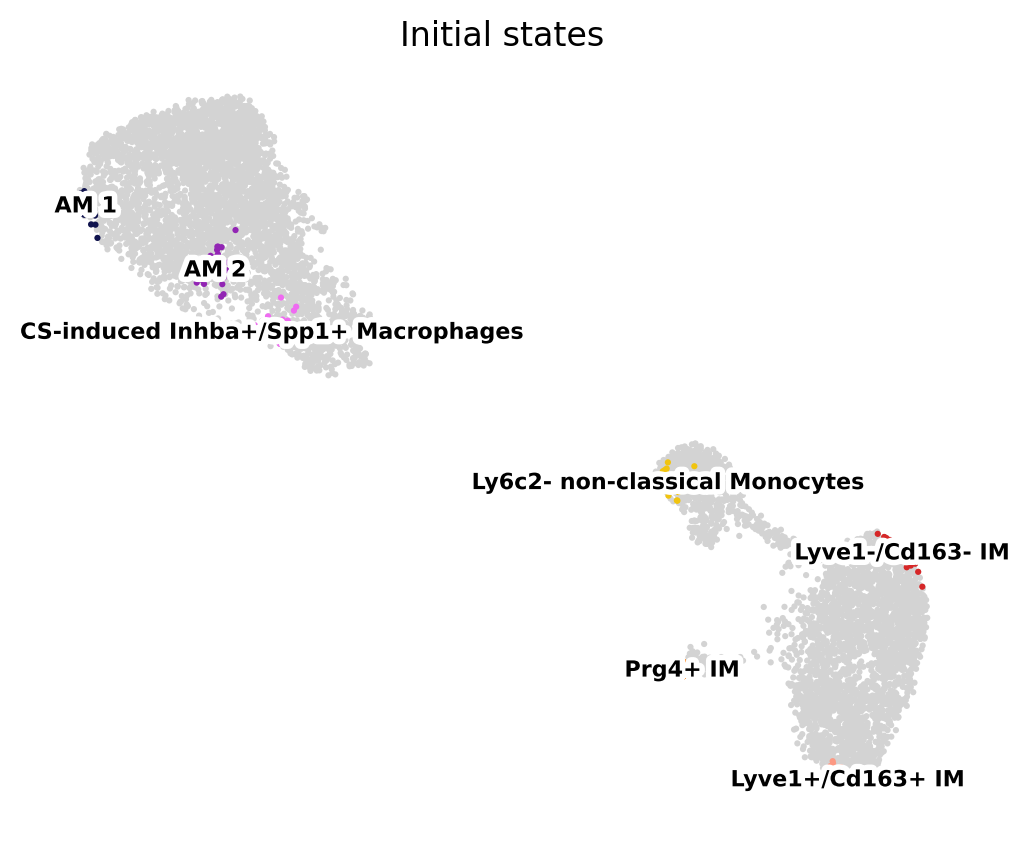

In [16]:
cr.tl.initial_states(adata, cluster_key='cell_type', n_states = 6)
cr.pl.initial_states(adata, discrete=True, legend_fontsize=8, legend_fontoutline=4, size = 20,
                      title = 'Initial states', save = 'initial_states.pdf' )

### Compute fate maps

saving figure to file /home/niklas/projects/macrophages_smoking_THOMAS/02_figures/cellrank/scvelo_fate_map.pdf


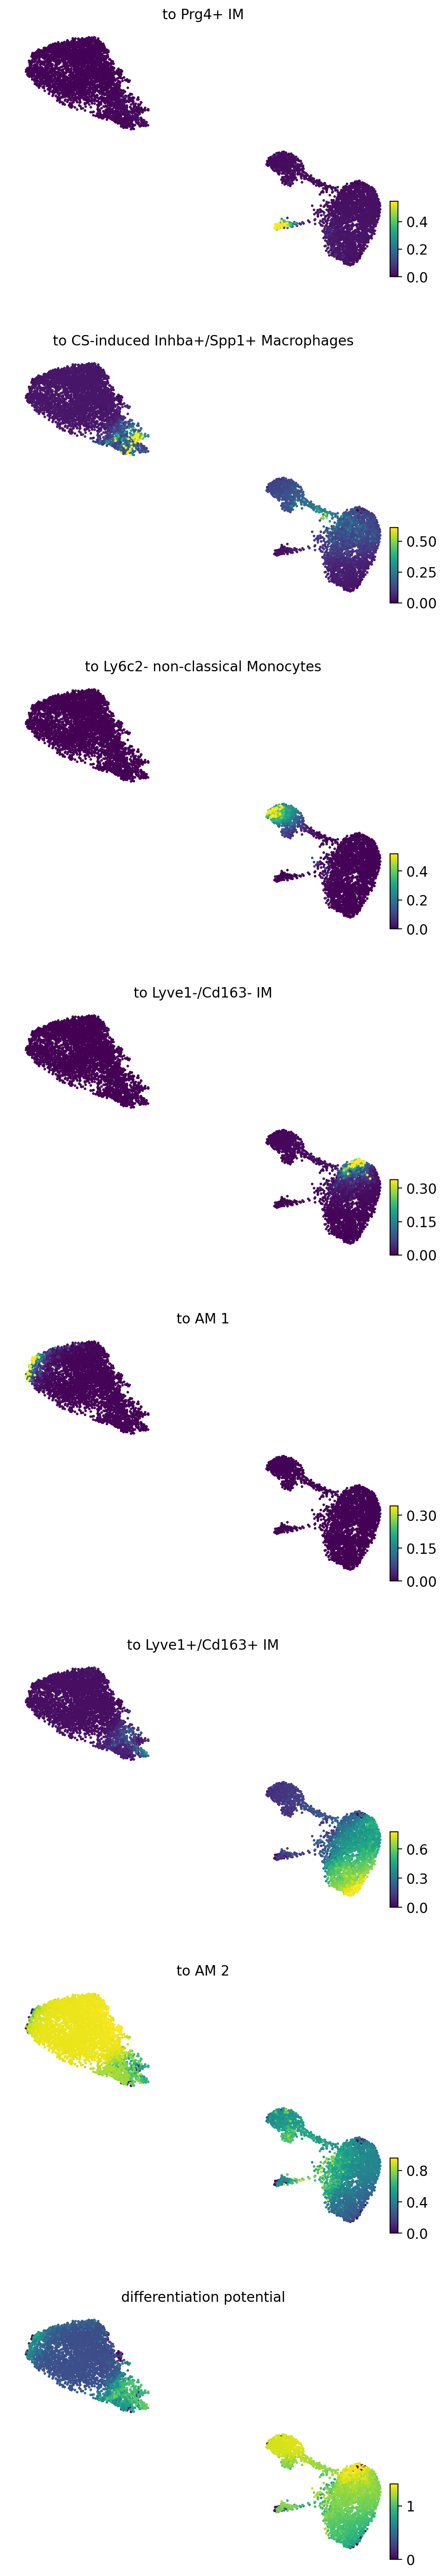

In [17]:
cr.tl.lineages(adata)
cr.pl.lineages(adata, same_plot = False, size = 20 , ncols = 1, save = 'fate_map.pdf')

saving figure to file /home/niklas/projects/macrophages_smoking_THOMAS/02_figures/cellrank/scvelo_fate_map_per_cell.pdf


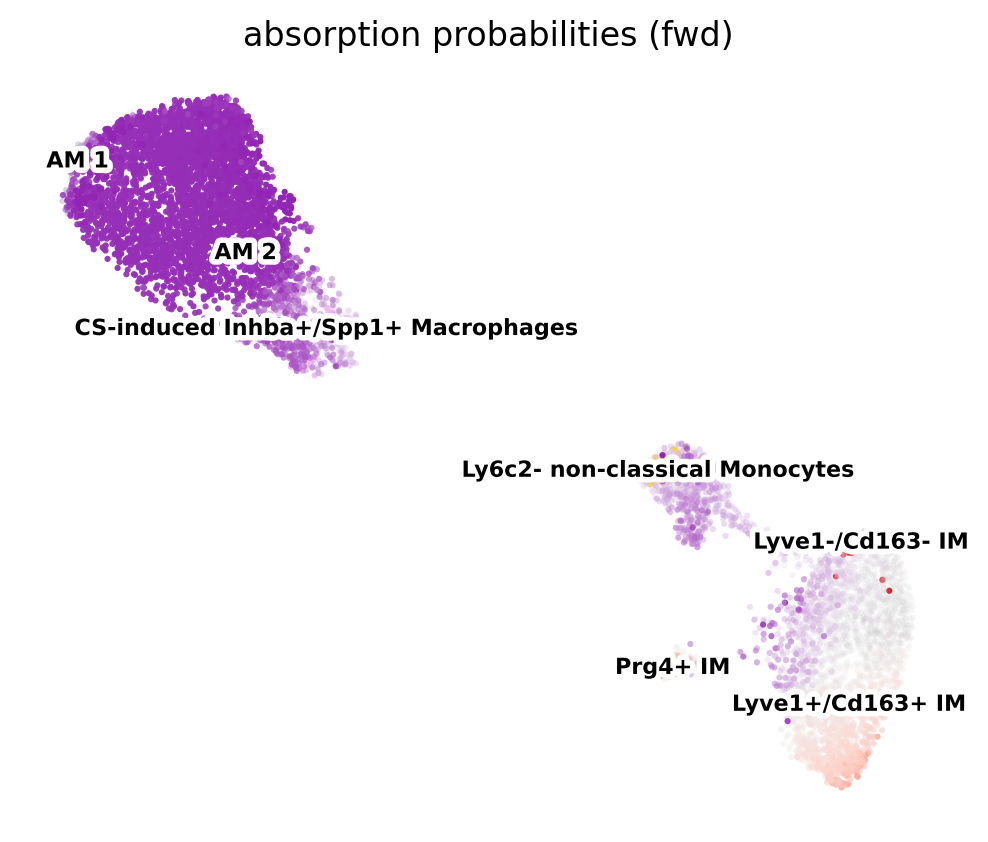

In [18]:
cr.pl.lineages(adata, same_plot=True, legend_fontsize=8, legend_fontoutline=4, size = 20,
               save = 'fate_map_per_cell.pdf')

### Fate probabilities of Ly6c2+ classical Monocytes

In [19]:
adata.obs.cell_type.cat.categories

Index(['AM', 'CS-induced Inhba+/Spp1+ Macrophages', 'Lyve1+/Cd163+ IM',
       'Lyve1-/Cd163- IM', 'Prg4+ IM', 'Ly6c2- non-classical Monocytes',
       'Ly6c2+ classical Monocytes'],
      dtype='object')

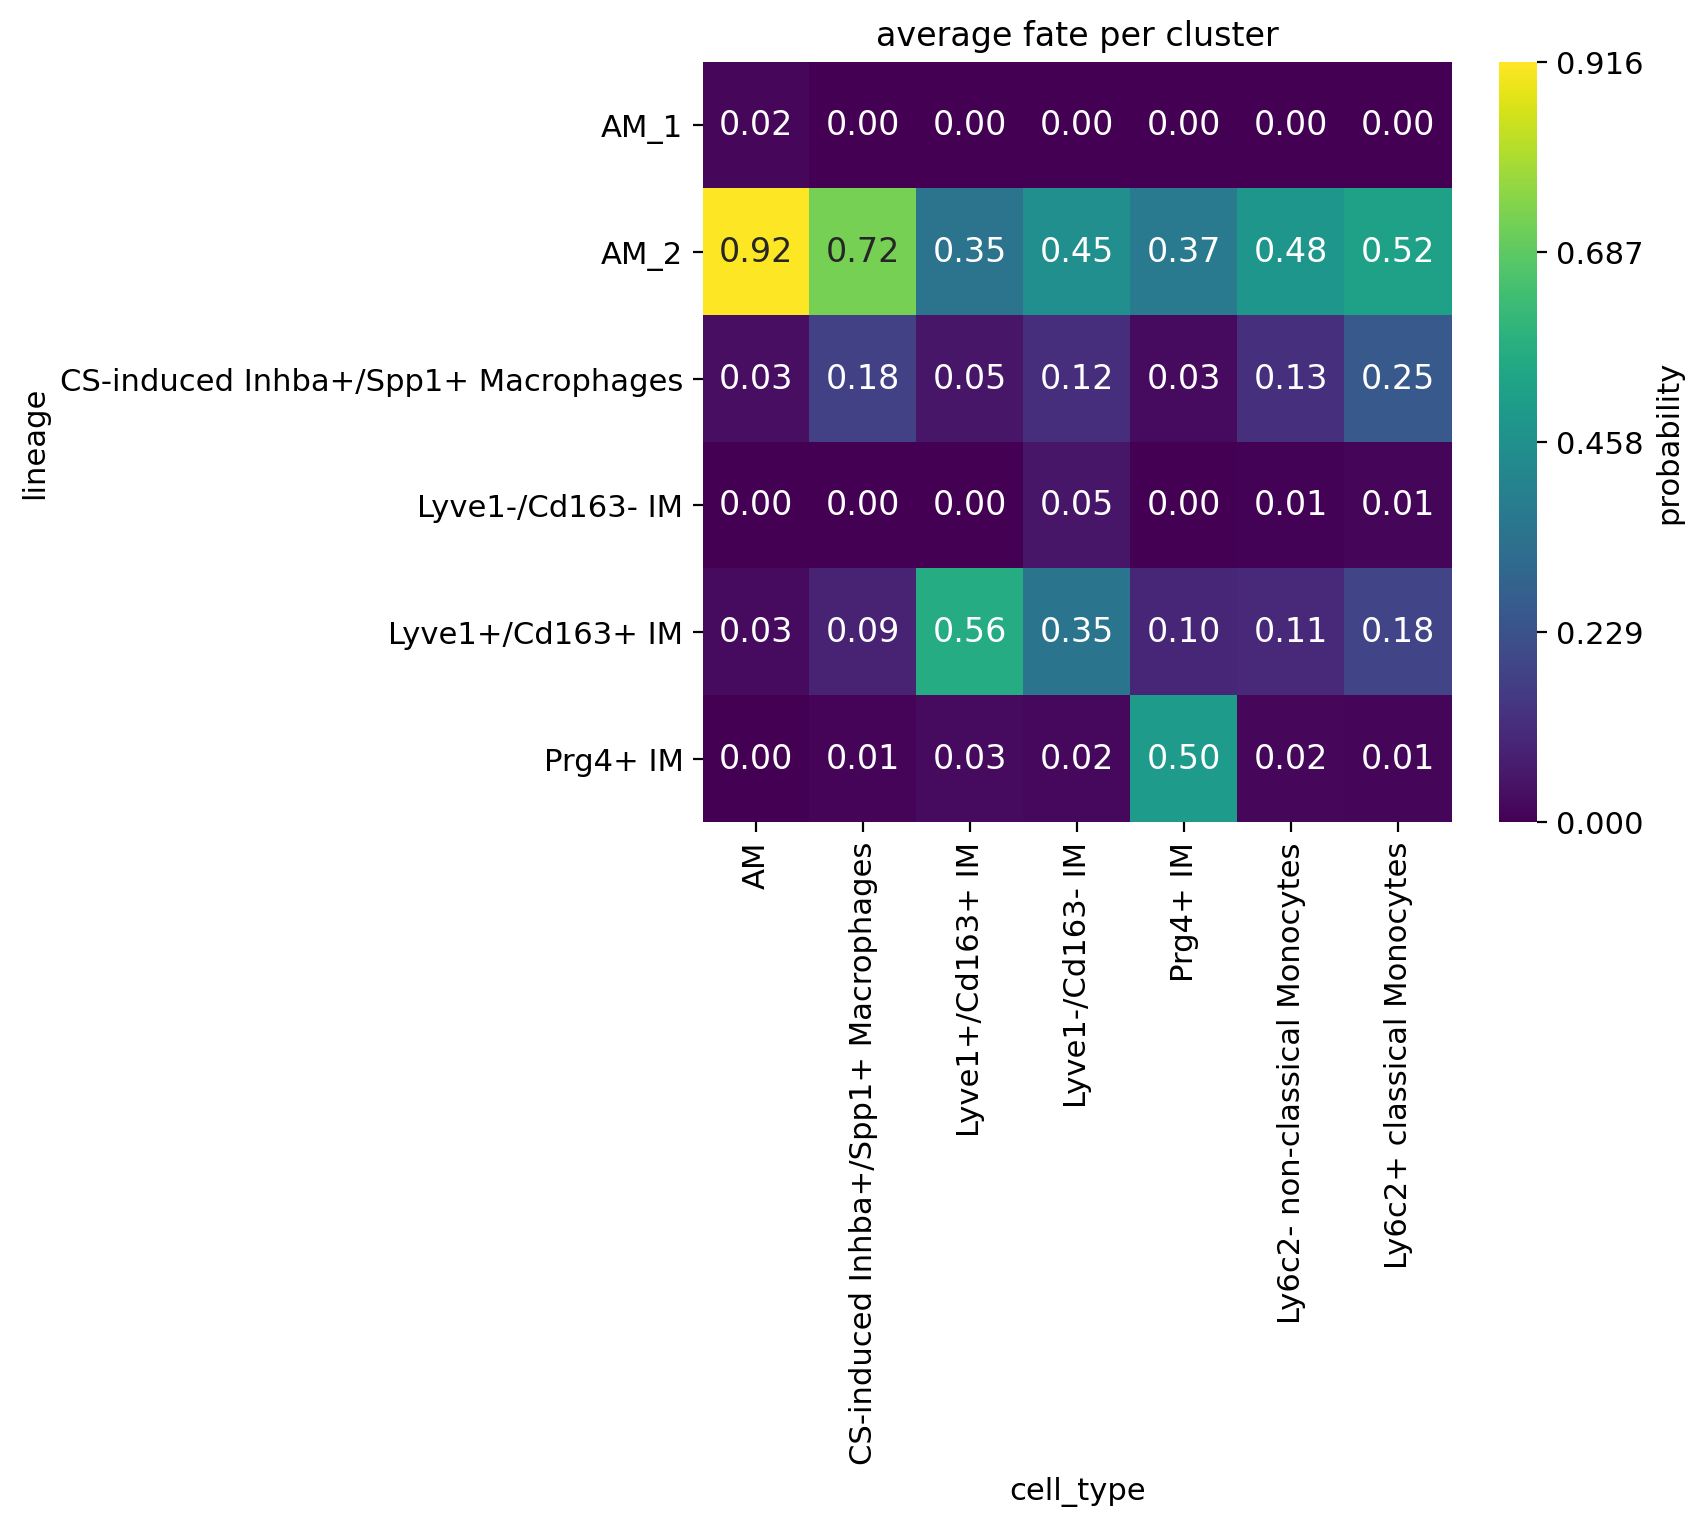

In [20]:
cr.pl.cluster_fates(adata, cluster_key = 'cell_type', mode = 'heatmap',
                    lineages = ['AM_1', 'AM_2', 'CS-induced Inhba+/Spp1+ Macrophages', 'Lyve1-/Cd163- IM', 'Lyve1+/Cd163+ IM', 'Prg4+ IM'],
                    clusters = ['AM', 'CS-induced Inhba+/Spp1+ Macrophages', 'Lyve1+/Cd163+ IM','Lyve1-/Cd163- IM', 'Prg4+ IM', 'Ly6c2- non-classical Monocytes','Ly6c2+ classical Monocytes'],
                    save = 'heatmap_fate_probabilities.pdf')

### Figure 1 m

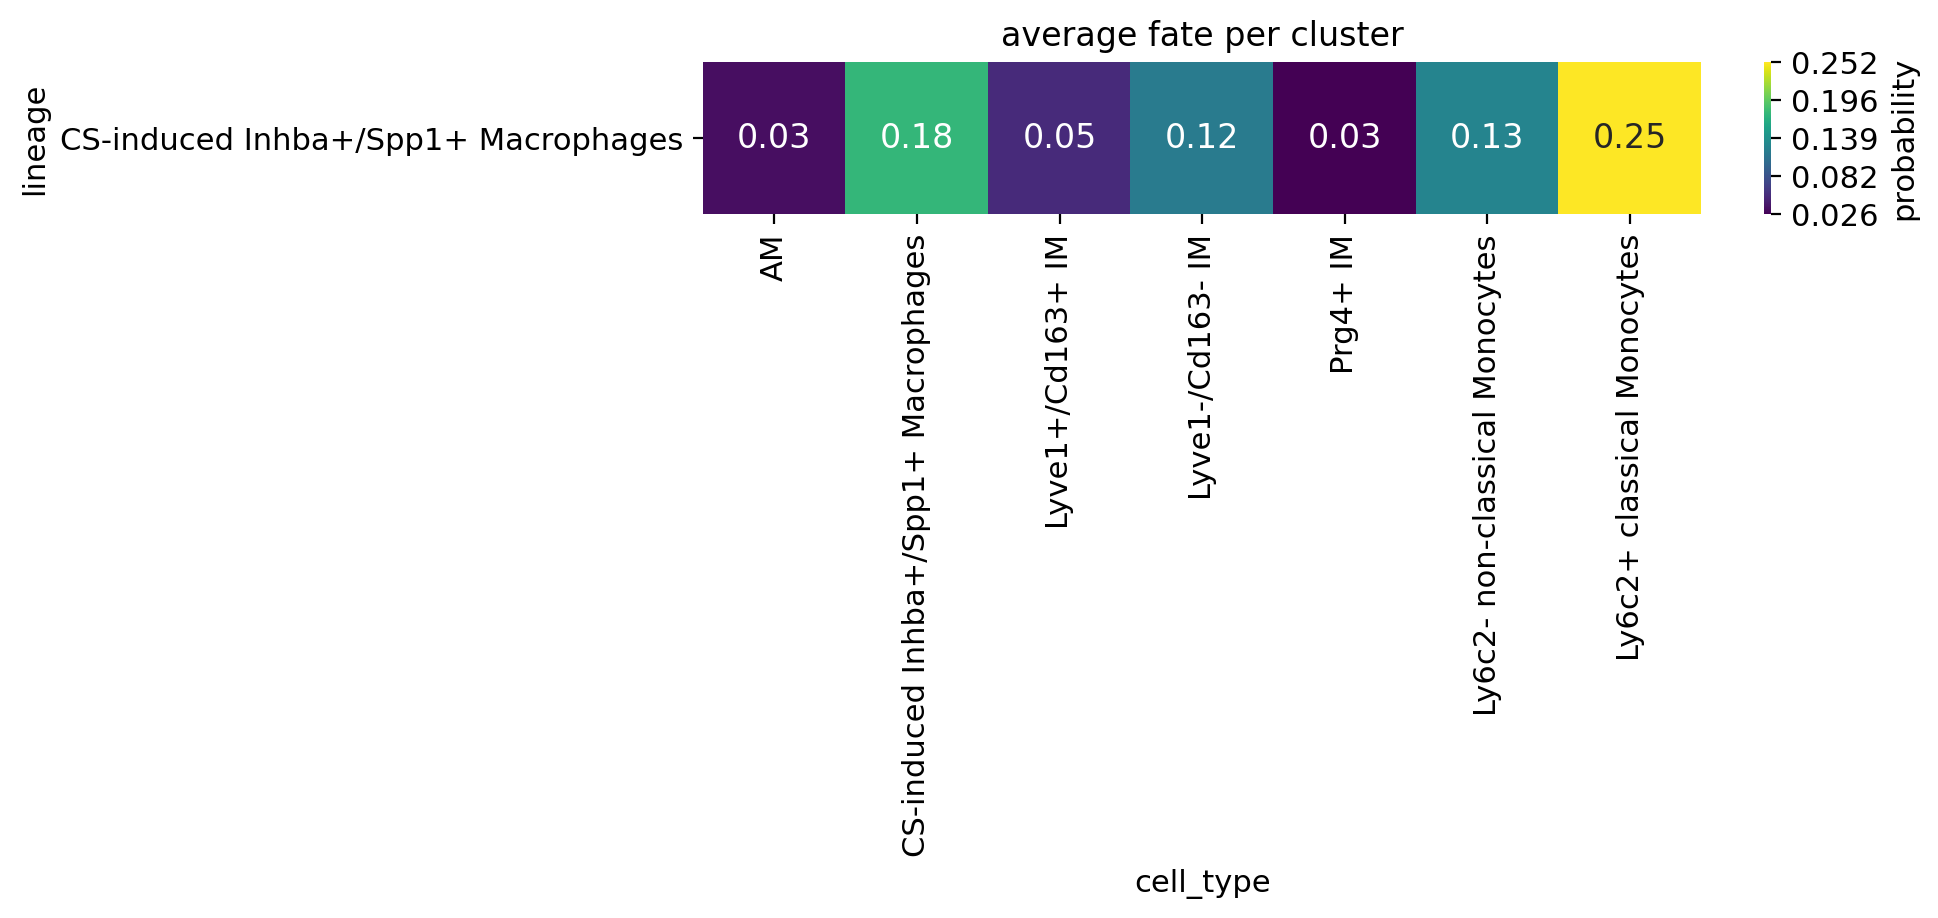

In [21]:
cr.pl.cluster_fates(adata, cluster_key = 'cell_type', mode = 'heatmap',
                    lineages = ['CS-induced Inhba+/Spp1+ Macrophages'],
                    clusters = ['AM', 'CS-induced Inhba+/Spp1+ Macrophages', 'Lyve1+/Cd163+ IM',
                                'Lyve1-/Cd163- IM', 'Prg4+ IM', 'Ly6c2- non-classical Monocytes',
                                'Ly6c2+ classical Monocytes'],
                    figsize=(8, 1),
                    save = 'heatmap_fate_probabilities_TO_CS_induced_macrophages.pdf')

### Compute coarse-grained transition matrix

In [22]:
## prepare kernel
k = cr.tl.transition_matrix(adata, weight_connectivities=0.2, softmax_scale=4, show_progress_bar=True)
g = cr.tl.estimators.GPCCA(k)

  0%|          | 0/7962 [00:00<?, ?cell/s]

In [23]:
## compute schur vectors
g.compute_schur(n_components=6)

In [24]:
## compute macrostates
g.compute_macrostates(n_states=6, cluster_key='cell_type')

Increasing `n_states` to `7`


/home/niklas/miniconda3/envs/macrophages_smoking_THOMAS/lib/python3.8/site-packages/cellrank/tl/estimators/_gpcca.py:572: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticks_labels)


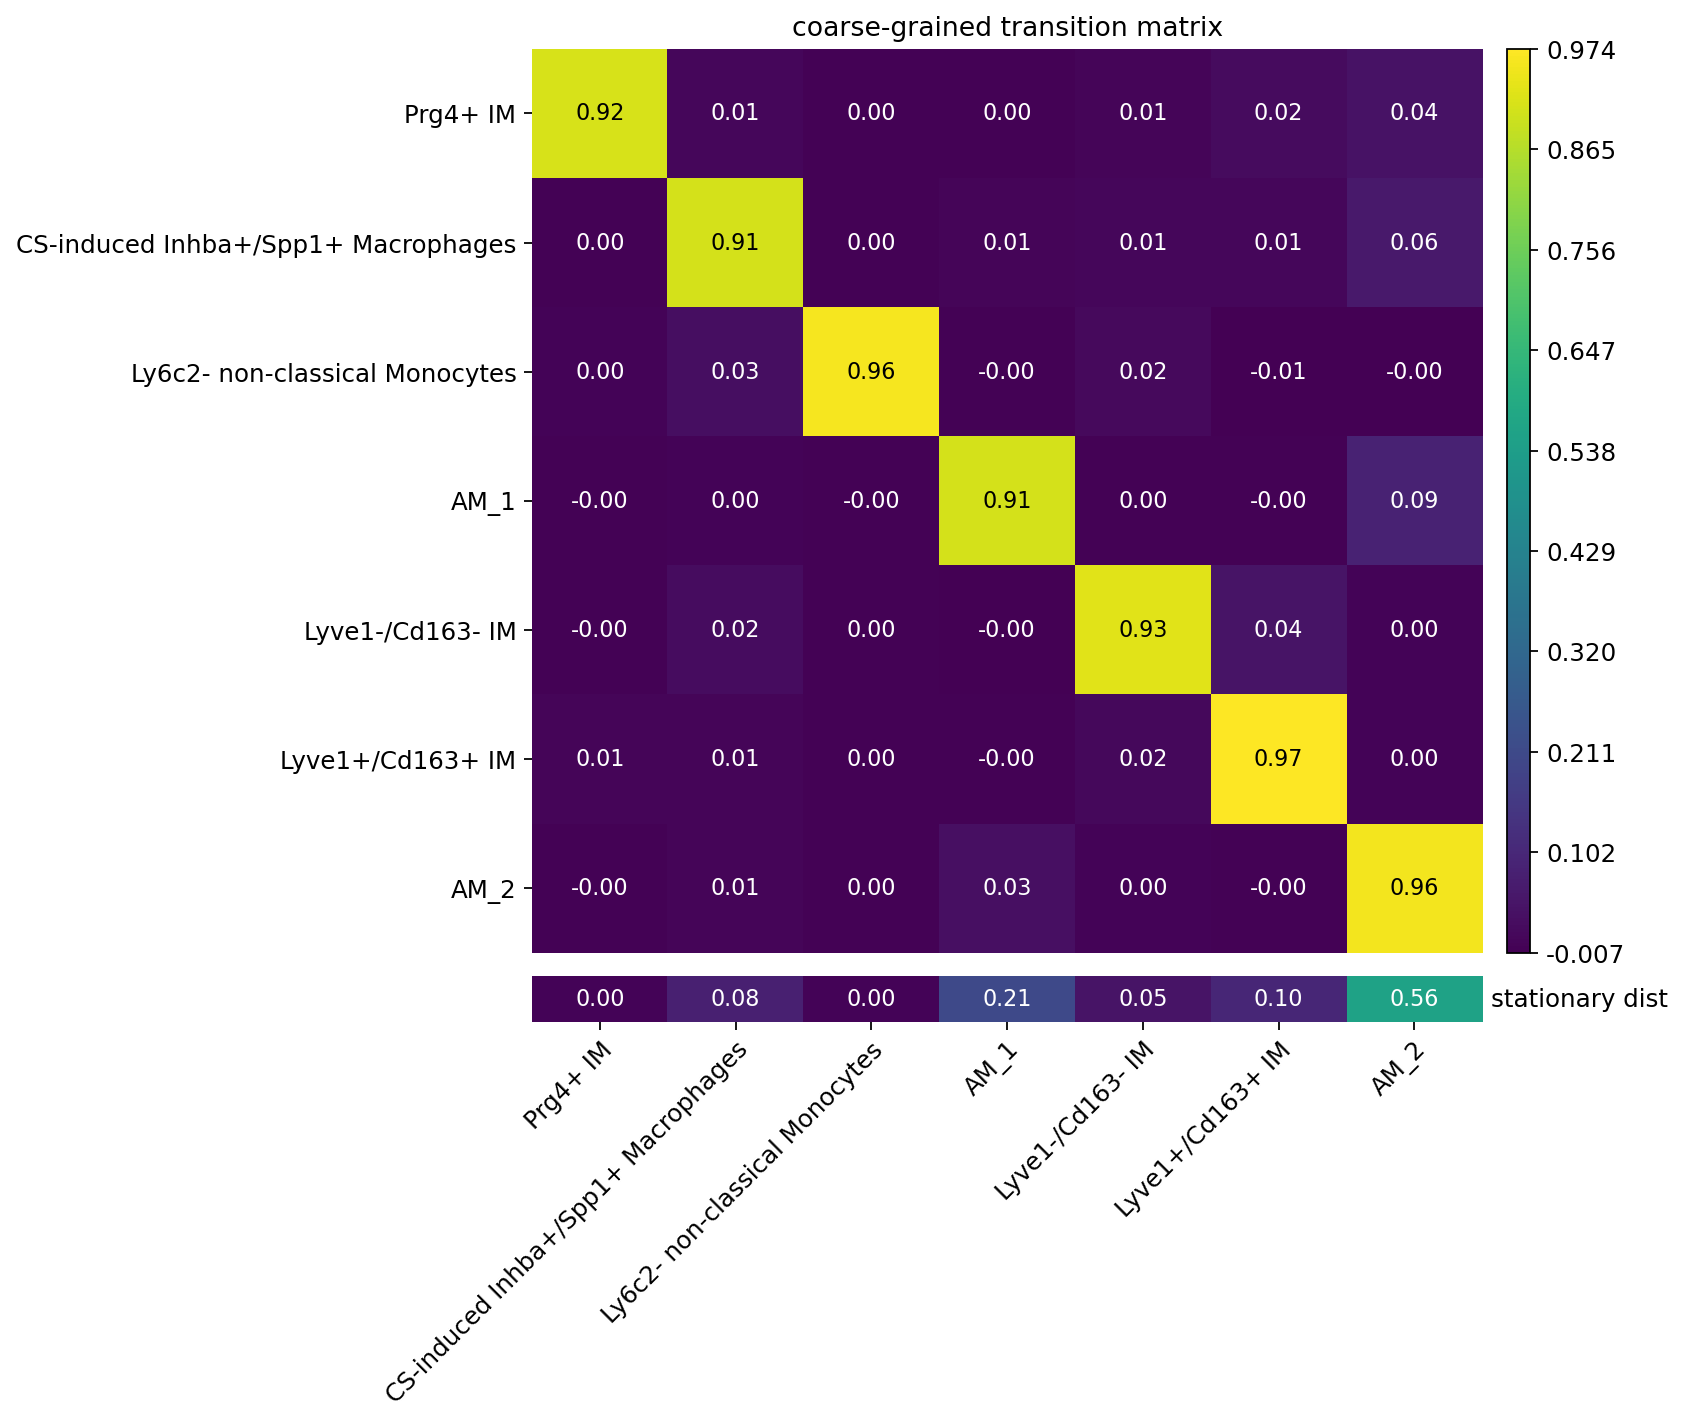

In [25]:
## plot transition matrix
g.plot_coarse_T(text_kwargs={'fontsize': 10})

### Compute lineage drivers

In [26]:
driver_genes = cr.tl.lineage_drivers(adata, lineages = 'CS-induced Inhba+/Spp1+ Macrophages', use_raw = False)
driver_genes.head(15)

CS-induced Inhba+/Spp1+ Macrophages corr  \
H2-Ab1                                  0.351978   
H2-Eb1                                  0.346871   
H2-Aa                                   0.342498   
Plbd1                                   0.308383   
Srgn                                    0.296359   
Cd74                                    0.296285   
Ccr2                                    0.294470   
Mmp14                                   0.275171   
B2m                                     0.257168   
Slamf7                                  0.251696   
Fam20c                                  0.242962   
H2-D1                                   0.236676   
Ctsb                                    0.232407   
Rplp0                                   0.231120   
Fcgr2b                                  0.218219   

        CS-induced Inhba+/Spp1+ Macrophages pval  \
H2-Ab1                             5.222391e-236   
H2-Eb1                             1.146827e-228   
H2-Aa                              1.698248e-222   
Plbd1                              6.988724e-178   
Srgn                               1.382222e-163   
Cd74                               1.687598e-163   
Ccr2                               2.097766e-161   
Mmp14                              4.183371e-140   
B2m                                8.341703e-122   
Slamf7                             1.555930e-116   
Fam20c                             2.134267e-108   
H2-D1                              9.549816e-103   
Ctsb                                5.248305e-99   
Rplp0                               6.787117e-98   
Fcgr2b                              3.918472e-87   

        CS-induced Inhba+/Spp1+ Macrophages qval  \
H2-Ab1                             5.525290e-233   
H2-Eb1                             8.088956e-226   
H2-Aa                              8.983731e-220   
Plbd1                              2.464690e-175   
Srgn                               4.178260e-161   
Cd74                               4.463698e-161   
Ccr2                               4.932082e-159   
Mmp14                              8.852012e-138   
B2m                                1.357773e-119   
Slamf7                             2.194898e-114   
Fam20c                             2.508949e-106   
H2-D1                              1.010370e-100   
Ctsb                                5.288292e-97   
Rplp0                               6.527972e-96   
Fcgr2b                              3.316595e-85   

        CS-induced Inhba+/Spp1+ Macrophages ci low  \
H2-Ab1                                    0.332583   
H2-Eb1                                    0.327400   
H2-Aa                                     0.322962   
Plbd1                                     0.288370   
Srgn                                      0.276191   
Cd74                                      0.276116   
Ccr2                                      0.274279   
Mmp14                                     0.254745   
B2m                                       0.236538   
Slamf7                                    0.231007   
Fam20c                                    0.222182   
H2-D1                                     0.215832   
Ctsb                                      0.211521   
Rplp0                                     0.210222   
Fcgr2b                                    0.197198   

        CS-induced Inhba+/Spp1+ Macrophages ci high  
H2-Ab1                                     0.371075  
H2-Eb1                                     0.366048  
H2-Aa                                      0.361743  
Plbd1                                      0.328126  
Srgn                                       0.316266  
Cd74                                       0.316193  
Ccr2                                       0.314403  
Mmp14                                      0.295352  
B2m                                        0.277565  
Slamf7                                     0.272157  
Fam20c                                     0.26352

In [27]:
top_driver_genes = driver_genes[:100]
top_driver_genes.to_csv('/home/niklas/projects/macrophages_smoking_THOMAS/01_data/210430_cellrank_top_driver_genes_CS_induced_Inhba+_Spp1+_Macrophages.csv')

saving figure to file /home/niklas/projects/macrophages_smoking_THOMAS/02_figures/cellrank/scvelo_top10_lineage_driver.pdf


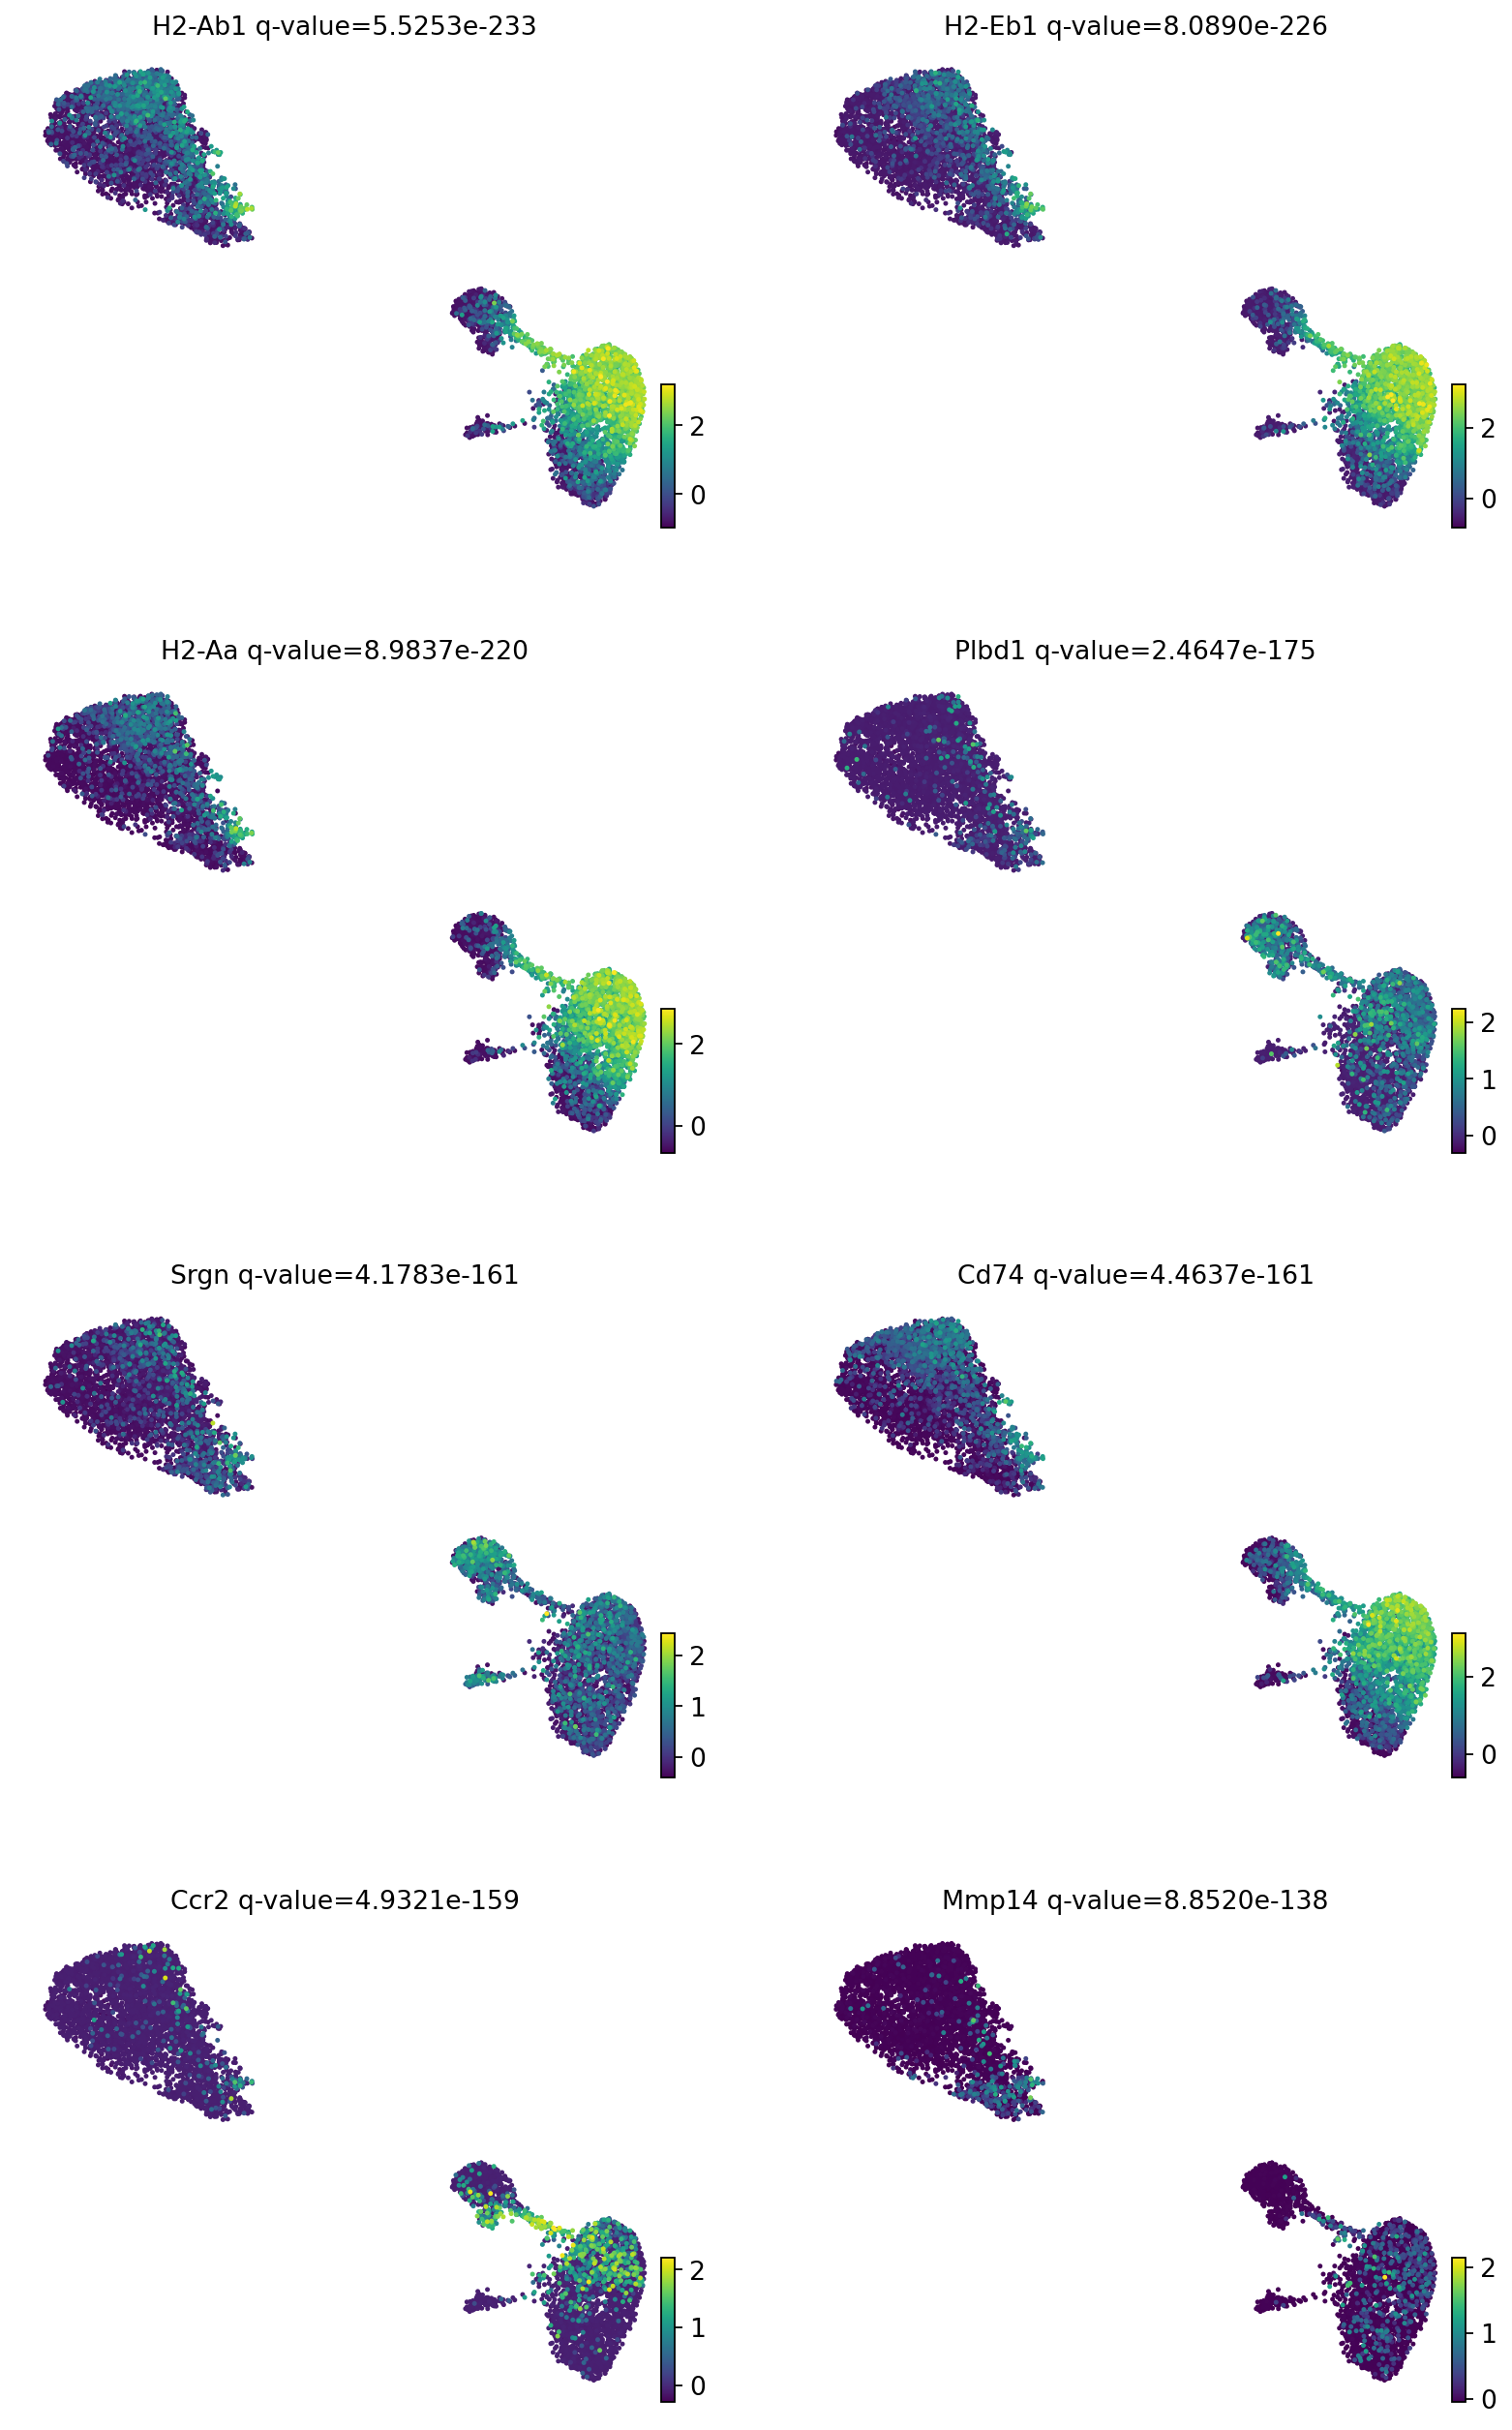

In [28]:
cr.tl.lineage_drivers(adata, lineages = 'CS-induced Inhba+/Spp1+ Macrophages', use_raw = False)
cr.pl.lineage_drivers(adata, lineage = 'CS-induced Inhba+/Spp1+ Macrophages', ncols = 2,
                     size = 20 , save = 'top10_lineage_driver.pdf')

### Lineage driver heatmap

In [29]:
cs_mac_corr = adata.var.sort_values(by='to CS-induced Inhba+/Spp1+ Macrophages corr', ascending=False)
cs_mac_corr = cs_mac_corr.head(50)
print(f"Selected {len(cs_mac_corr)} genes")

Selected 50 genes


In [30]:
## compute latent time
scv.tl.recover_latent_time(adata, root_key='initial_states_probs', end_key='terminal_states_probs')

computing latent time using initial_states_probs, terminal_states_probs as prior
    finished (0:00:01) --> added 
    'latent_time', shared time (adata.obs)


In [31]:
# compute dpt, starting from CellRank defined root cell
root_idx = np.where(adata.obs['cell_type'] == 'Ly6c2+ classical Monocytes')[0][0]
adata.uns['iroot'] = root_idx
sc.tl.dpt(adata)

computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [1.         0.9916918  0.98187953 0.9741542  0.956775   0.9484406
     0.9315709  0.9028895  0.8814466  0.8628934  0.86038285 0.8520501
     0.84899324 0.8356014  0.8280967 ]
    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:00:00)
computing Diffusion Pseudotime using n_dcs=10
    finished: added
    'dpt_pseudotime', the pseudotime (adata.obs) (0:00:00)


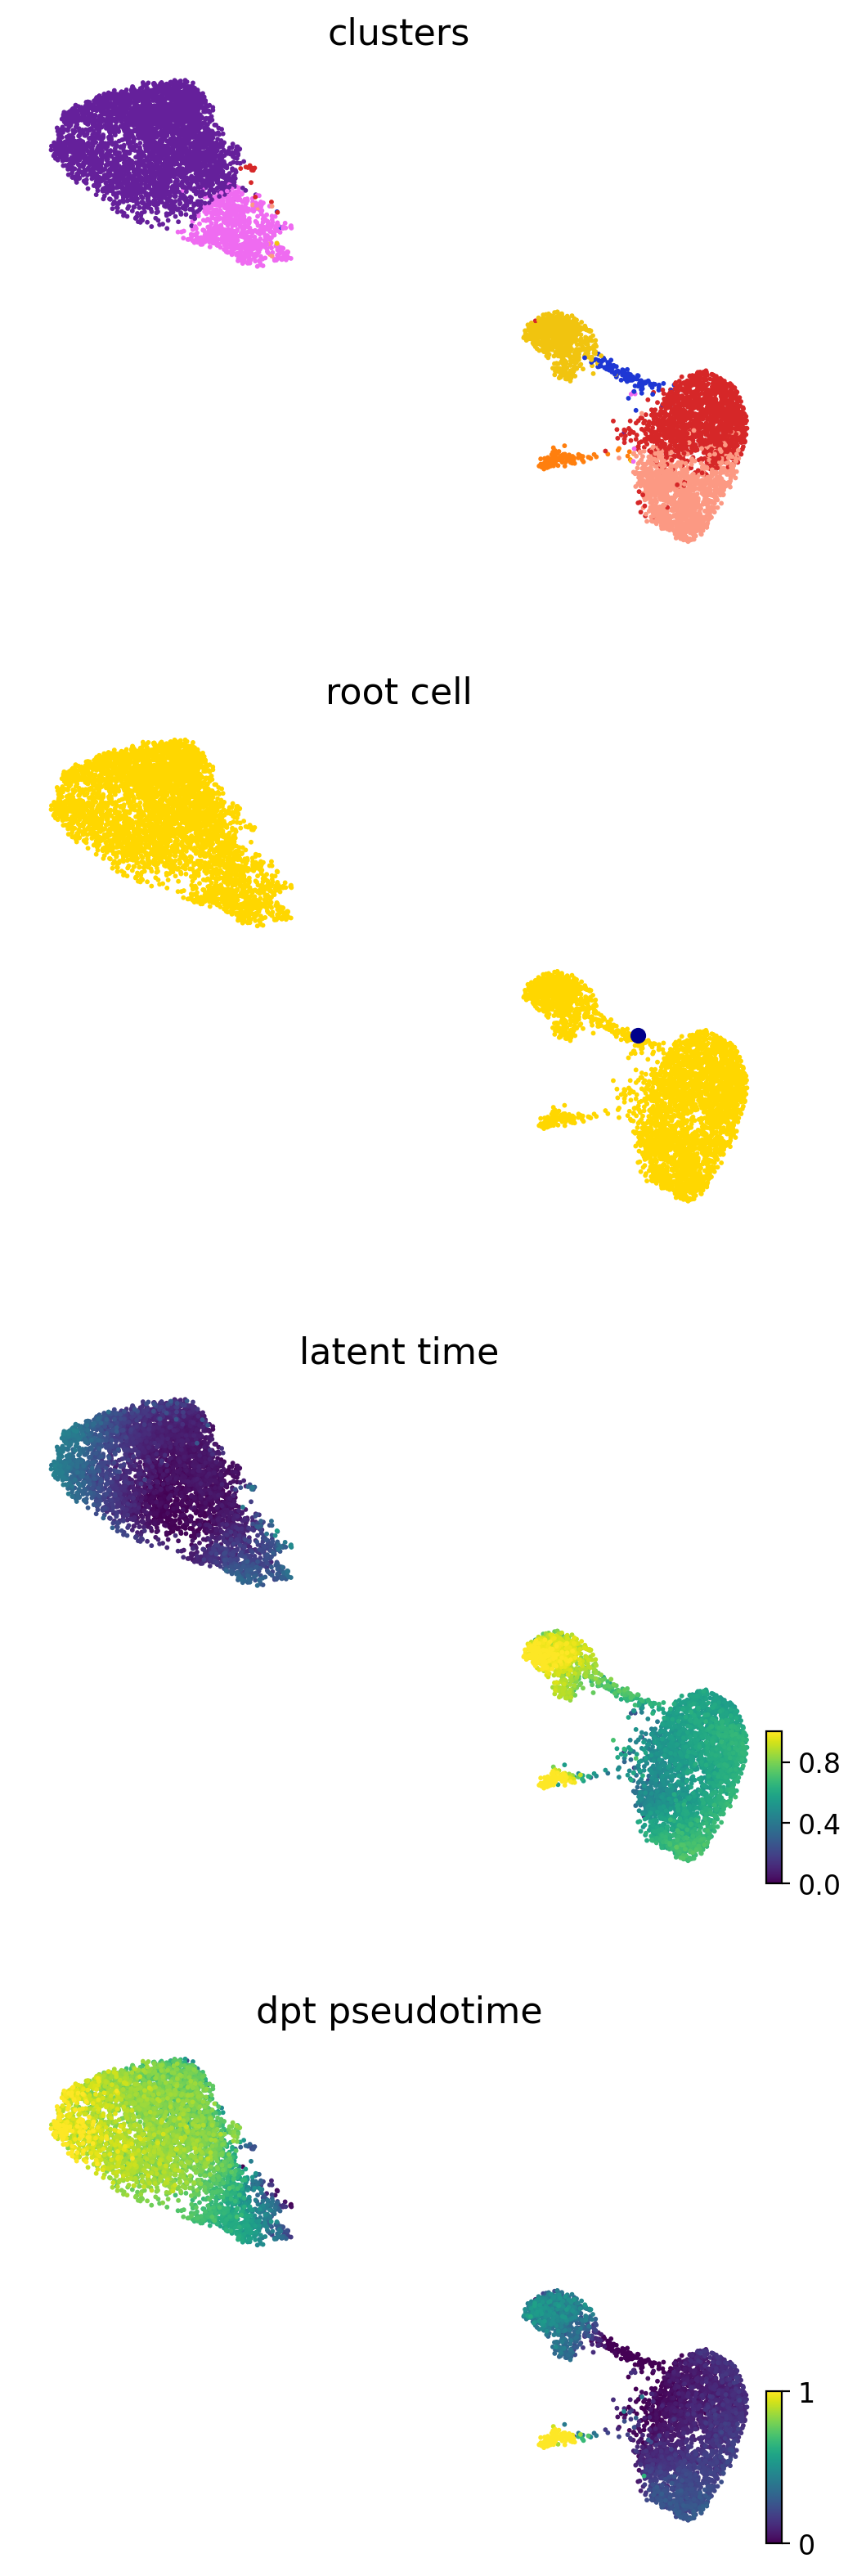

In [32]:
scv.pl.scatter(adata, color=['cell_type', root_idx, 'latent_time', 'dpt_pseudotime'], fontsize=16,
               cmap='viridis', perc=[2, 98], colorbar=True, rescale_color=[0, 1],
               title=['clusters', 'root cell', 'latent time', 'dpt pseudotime'], ncols = 1)